# Supervised learning project
Sandesh Balyan

# Context

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

# Problem Statement
The classification goal is to predict the likelihood of a liability customer buying personal loans.


### Comments

###### Target Variable
1. Target variable is 'Personal Loan' - which indicates wheather customer opted for personal loan or not
2. class = 0 means customer didnot opt for Personal Loan
3. Class = 1 means customer opted for personal loan

###### Metric selection
1. Since the problem statement here demands to accurately predict customers who are likly to opt for Personal loans based upon other parameters.
2. Also as per the data definition it seems that only 9.6% customers opted for Personal loans hence this dataset seems to be highly imablanced

Because of the above issues and looking at the nature of the problem, accuracy of the model will NOT be the only metric for evaluation of the model.
We need to maximise the correct prediction of Positives i.e True Positives should be high and False Positives should be low.
Hence Precision and Recall along with accuracy will be another important parameter vor Model Evaluation


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import itertools

###  Loading the dataset

In [2]:
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
data.groupby('Personal Loan').count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


There are total 4520 values for class=0 i.e customers who didnot opt for Personal Loan
There are total 480 values for class=0 i.e customers who opted for Personal Loan

Dataset is highly imbalanced on Target Variable

### Basic EDA 

In [4]:
data.shape

(5000, 14)

###### Observations
    1.There are 5000 rows and 14 columns in the dataset.
    2.There are some columns which doesnot seem to be useful. For example ID, ZIP Code. We will analyse thier usefulness and handle these columns later


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
for col in np.array(data.columns):
    print("Number of unique values in column - " + col + "\t " + str(len(data[col].unique())))

Number of unique values in column - ID	 5000
Number of unique values in column - Age	 45
Number of unique values in column - Experience	 47
Number of unique values in column - Income	 162
Number of unique values in column - ZIP Code	 467
Number of unique values in column - Family	 4
Number of unique values in column - CCAvg	 108
Number of unique values in column - Education	 3
Number of unique values in column - Mortgage	 347
Number of unique values in column - Personal Loan	 2
Number of unique values in column - Securities Account	 2
Number of unique values in column - CD Account	 2
Number of unique values in column - Online	 2
Number of unique values in column - CreditCard	 2


###### Observations:
    1.Also there are few columns like 'education, family, Securities Account, CD Account, Online, Credit Card' that seems to be ordinal or binary in nature. We will analyse them and take appropriate steps to handle the same later, which may lead to increase in the number of variables
    2.Columns 'Income', 'Mortgage' and 'CC Avg' are in thousands. hence appropriate steps will be taken to handle the same

### Checking presence of missing values

In [7]:
data.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

##### Observations:
1. There are no missing values in any of the columns. Hence no action is required to handle null values

###  Checking presence of duplicate values

In [8]:
data.duplicated().value_counts()

False    5000
dtype: int64

#####  Observations:
1. There are no duplicate values in entire dataset. Hence no action is required to handle the same.

### Dropping variables which are not important

In [9]:
data = data.drop(['ID','ZIP Code'], axis=1)

In [10]:
data.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [11]:
col_numeric = ['Age','Experience','Income','CCAvg','Mortgage']
col_cat = ['Family','Education','Securities Account', 'CD Account','Online','CreditCard']
target_var = ['Personal Loan']

##  Analysis of Categorical Variables

We will first perform univariate,multivariate analysis on categorical variables
In this section we will also see distribution of Target variable with all the categorical variables

In [12]:
# Separate the dataset for categorical variable and the target varibale
df_cat = data[col_cat]
df_cat['Personal Loan'] = data['Personal Loan']
df_cat.head()

,Family,Education,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,4,1,1,0,0,0,0
1,3,1,1,0,0,0,0
2,1,1,0,0,0,0,0
3,1,2,0,0,0,0,0
4,4,2,0,0,0,1,0


In [13]:
# lets check which are the unique values in categorical variables
for col in np.array(df_cat.columns):
    print(f"Unique values in column:"+col+"\t"+str(list(df_cat[col].unique())))

          


Unique values in column:Family	[4, 3, 1, 2]
Unique values in column:Education	[1, 2, 3]
Unique values in column:Securities Account	[1, 0]
Unique values in column:CD Account	[0, 1]
Unique values in column:Online	[0, 1]
Unique values in column:CreditCard	[0, 1]
Unique values in column:Personal Loan	[0, 1]


1. We know from above that unique values in variable 'Family' are 4. this is the number of members in each family
2. Uniques in Education are 1,2 and 3. there description from pdf are: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
3. other variables Securities Account, CD account, Online, CreditCard are all boolean and are only true or false

###  Distribution of all categorical variables

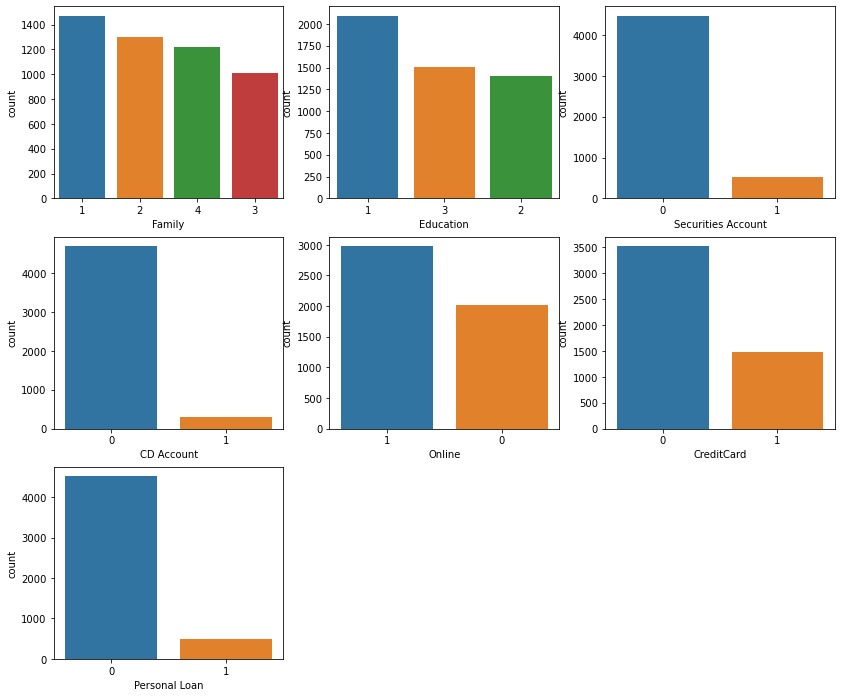

In [14]:

fig = plt.figure(1, (14, 12))
for i,col in enumerate(df_cat.columns):
    ax=plt.subplot(3,3,i+1)
    sns.countplot(x=df_cat[col],order=df_cat[col].value_counts().index)
    

### Insights:
1. Securities Accounts and CD Accounts are highly imbalanced dataset. It means there are huge number of peopele who donot have Securities and CD accounts
2. Large number of customers in the dataset donot have Credit cards
3. Number of customers using online banking is far LOW than the ones not using the online banking facilities
4. Target variable is also imbalanced. i.e People who didnot buy personal loan are way more than the people who did
5. Except distribution of variable Family and Education all other variables are highly imbalalnced


##### Plotting combination of various Variables

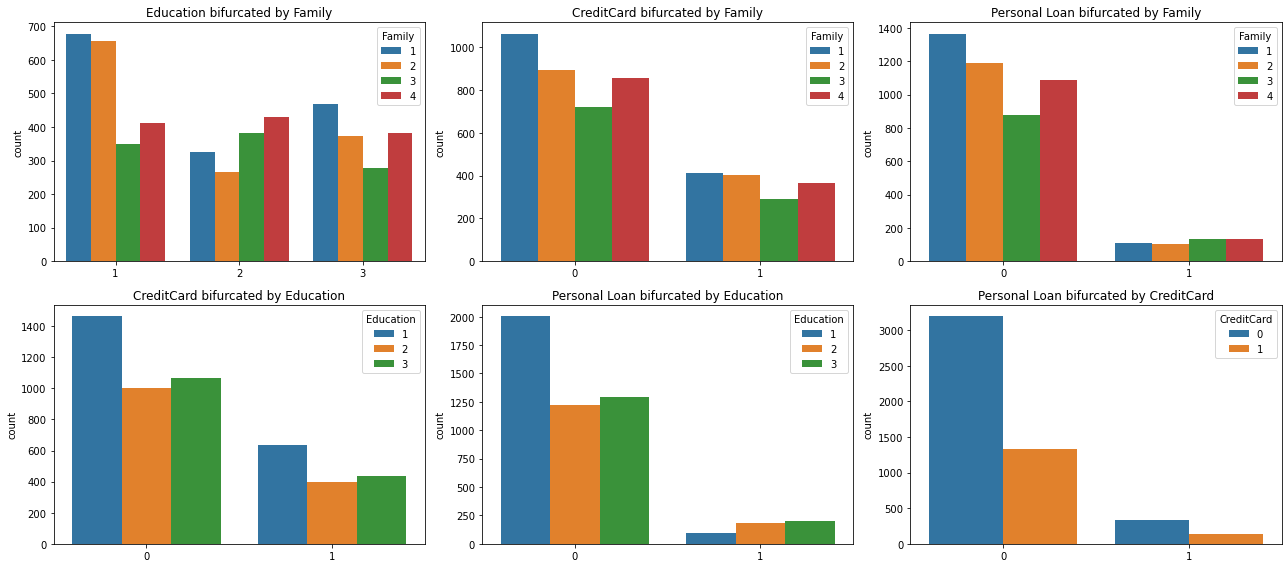

In [15]:
combos = itertools.combinations(['Family', 'Education','CreditCard', 'Personal Loan'],2)
fig = plt.figure(1, (18, 8))

i = 0
for pair in combos:
    i+=1
    ax = plt.subplot(2,3,i)
    sns.countplot(x=pair[1], hue=pair[0], data=df_cat)
    ax.set_xlabel(None)
    ax.set_title(f'{pair[1]} bifurcated by {pair[0]}')
    plt.tight_layout()

##### Insights

Credit card bifurcated by education
1. Undergrads tend to use more credit card than other Graduates and professionals

Perosnal loan bifurcated by credit cards
1. Very less number of customers using a credit card tend to buy Personal loan.
2. Number of customers who bought personal loans and NOT using a credit cards is slightly more than the customers using a credit cards

Personal Loan bifurcated with family
1. Among the customers who opted for personal loans, Customers with family members 3 and 4 are slightly more than customers with 1 and 2 family members
2. Among the customers who didnot opt for Personal loans, highest number is of customers living single and lowest is for customers with 3 memebrs in the family

### Categorical vs Target Variable

We will check distribution of all categorical variable with respect to the target variable which is Personal Loan

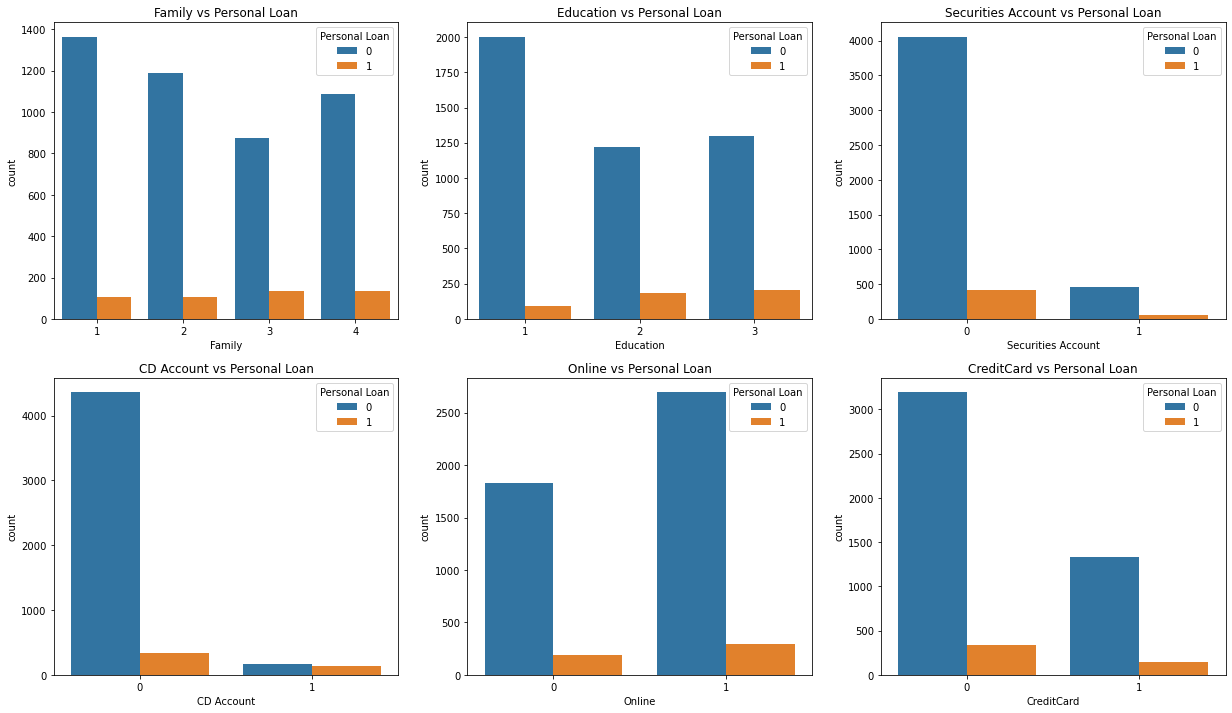

In [16]:
fig = plt.figure(1, (21,12))

for i,col in enumerate(df_cat.drop(['Personal Loan'],axis=1).columns):
    ax = plt.subplot(2,3,i+1)
    sns.countplot(x=df_cat[col],hue=df_cat['Personal Loan'])
    ax.set_title(col + ' vs '+ 'Personal Loan')


##### Insights
Family vs Personal Loan
1. There is  a slight ,very marginal, increase in number of customers buying a personal loan with increase in the number of members in the family
2. Lowest number of customers not buying a personal loan is with number of members = 3
3. Highest number of customers not buying a personal loan lives alone. We can assume not to taeget single people for personal loan.

Education vs Personal Loan
1. Among the customers who bought personal loans, customers with higher education level tend to buy more perosnal loans
2. Among the customers who DIDNOT buy perosnal loan, Undegraduates consitutes highest number of customers

Securities VS Personal Loans
1. Most of the customers with Securities account tend not to buy personal loans. 
2. Securities account variable doesnot seems to have no influence on customers buying Personal loans

CD Account vs Personal Loans
1. Most of the customers with CD account tend not to buy personal loans. 
2. CD account variable doesnot seems to have no influence on customers buying Personal loans

Online vs Personal Loans
1. Among the customers who bought personal loans customer using online banking tends to buy more than the ones not using
2. Among the customers using online banking, majority of the customers didnot buy personal loans.
3. This variable also doesnot seem to have any influence customers buying a personal loans

Credit card vs Personal loans
1. Among the customers who bought personal loans. customers not using a credit card tend to buy more personal loan

General:
Dataset is highly imbalanced for almost all variables.
There are no conclusive insights that we can gather from these variables.

##  Anlaysis of Numeric variables

In [17]:
# list of numeric columns among all columns
col_numeric

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

In [18]:
#Separating the dataset with only numeric columns from rst of the dataset
df_num = data[col_numeric]
df_num['Personal Loan'] = data['Personal Loan']
df_num.head()

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan
0,25,1,49,1.6,0,0
1,45,19,34,1.5,0,0
2,39,15,11,1.0,0,0
3,35,9,100,2.7,0,0
4,35,8,45,1.0,0,0


### Descriptive Stattistics : Five points summary of numeric columns

In [19]:
data[col_numeric].describe()

,Age,Experience,Income,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,1.937938,56.498800
std,11.463166,11.467954,46.033729,1.747659,101.713802
min,23.000000,-3.000000,8.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,0.700000,0.000000
50%,45.000000,20.000000,64.000000,1.500000,0.000000
75%,55.000000,30.000000,98.000000,2.500000,101.000000
max,67.000000,43.000000,224.000000,10.000000,635.000000


### Five points summary through BOX plots

(0.0, 1.0, 0.0, 1.0)

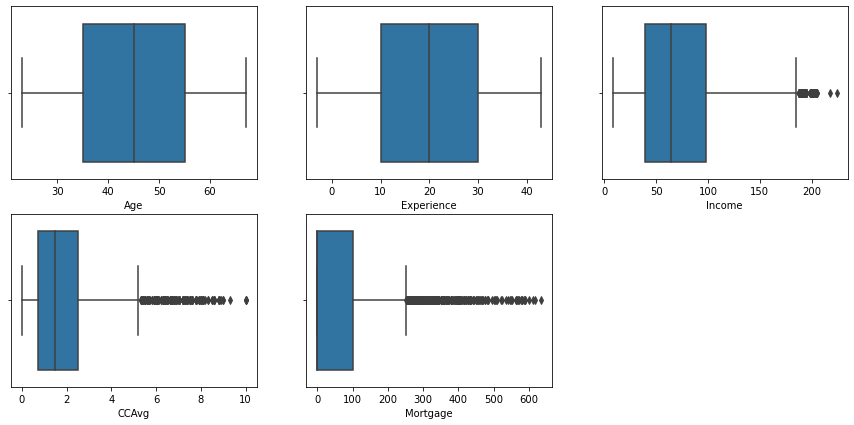

In [20]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(15,7))
sns.boxplot(data['Age'],ax=ax1)
sns.boxplot(data['Experience'],ax=ax2)
sns.boxplot(data['Income'],ax=ax3)
sns.boxplot(data['CCAvg'],ax=ax4)
sns.boxplot(data['Mortgage'],ax=ax5)

ax6.axis('off')


##### Observations:
1. Looking at mean and median(Q2) there seems to be right skewness in variables Income, CCAvg and Mortgage
2. There will be presence of outliers in these variables
3. Experience variable has minimum value of -3 which is not possible as this is in years. We will take care of all the negative values in this column in next steps
4. Variable Mortgage has min, Q1 and Q2 values as 0. This shows that there are huge number of zeros in this variable. We will handle them in the next steps
5. For variable 'Age' and 'Experience' mean and median are approx same hence no skewness expected in the distribution of these variables
------------------------------------------------------------------------------------------------------------------------------
PS: We will first perfom EDA before handling noisy values in all these columns

###  Checking distributions of Numeric variables

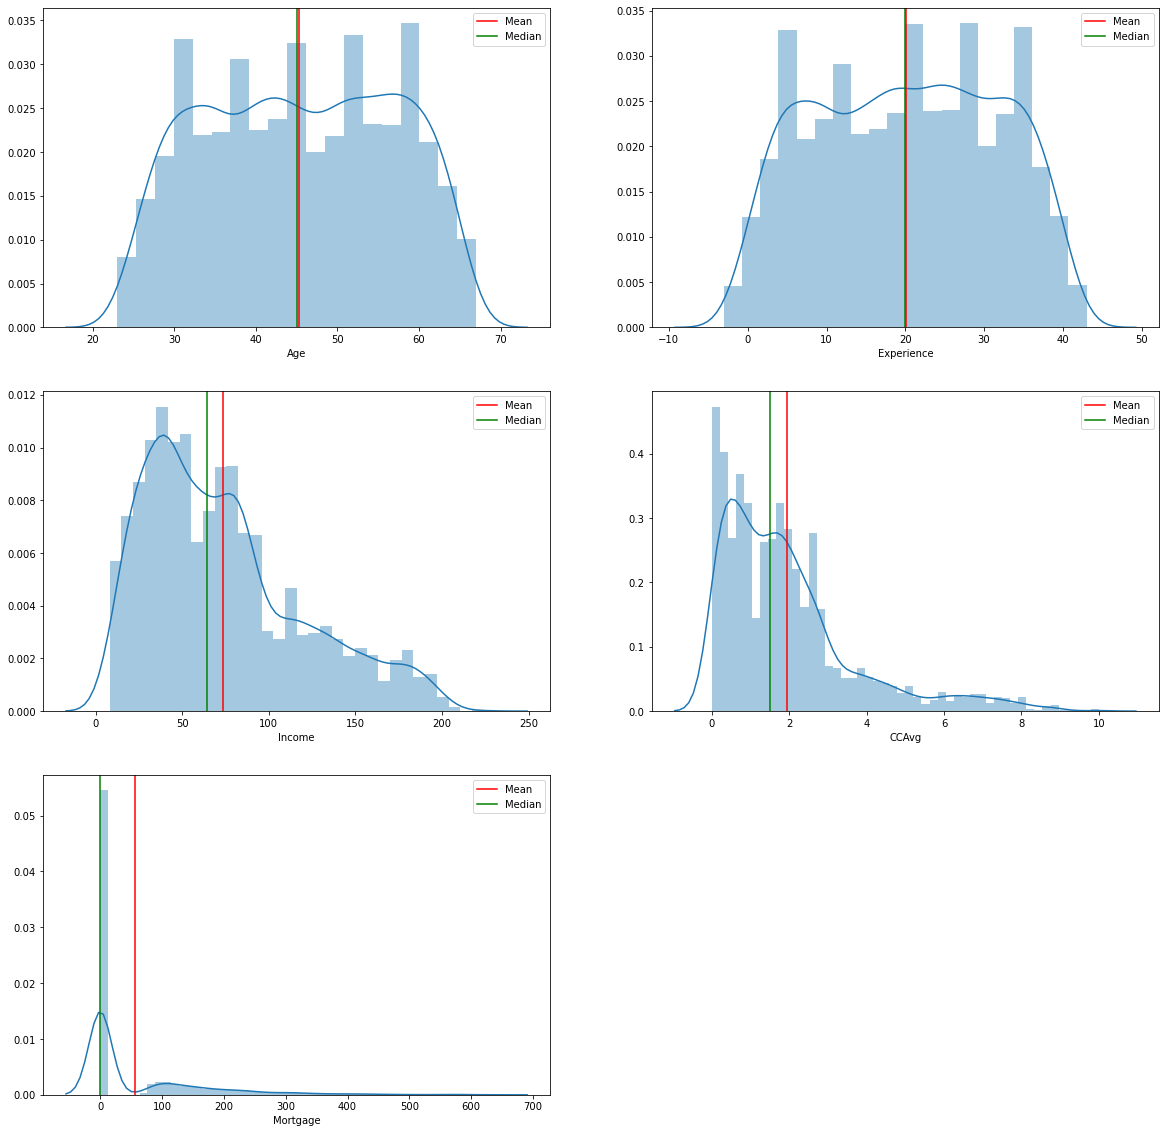

In [21]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(20,20))
sns.distplot(data['Age'],ax=ax1,kde=True)
sns.distplot(data['Experience'],ax=ax2,kde=True)
sns.distplot(data['Income'],ax=ax3,kde=True)
sns.distplot(data['CCAvg'],ax=ax4,kde=True)
sns.distplot(data['Mortgage'],ax=ax5,kde=True)

ax6.axis('off')
ax1.axvline(data['Age'].mean(),c='r',label='Mean')
ax1.axvline(data['Age'].median(),c='g',label='Median')
ax1.legend(loc="upper right")

ax2.axvline(data['Experience'].mean(),c='r',label='Mean')
ax2.axvline(data['Experience'].median(),c='g',label='Median')
ax2.legend(loc="upper right")

ax3.axvline(data['Income'].mean(),c='r',label='Mean')
ax3.axvline(data['Income'].median(),c='g',label='Median')
ax3.legend(loc='upper right')

ax4.axvline(data['CCAvg'].mean(),c='r',label='Mean')
ax4.axvline(data['CCAvg'].median(),c='g',label='Median')
ax4.legend(loc='upper right')

ax5.axvline(data['Mortgage'].mean(),c='r',label='Mean')
ax5.axvline(data['Mortgage'].median(),c='g',label='Median')
ax5.legend(loc='upper right')

##### Insights
1. Mortgage column has too many 0s
2. Only Age and Experience follows gaussian Distribution to larger extent
3. Income and CCAcvg are right skewed

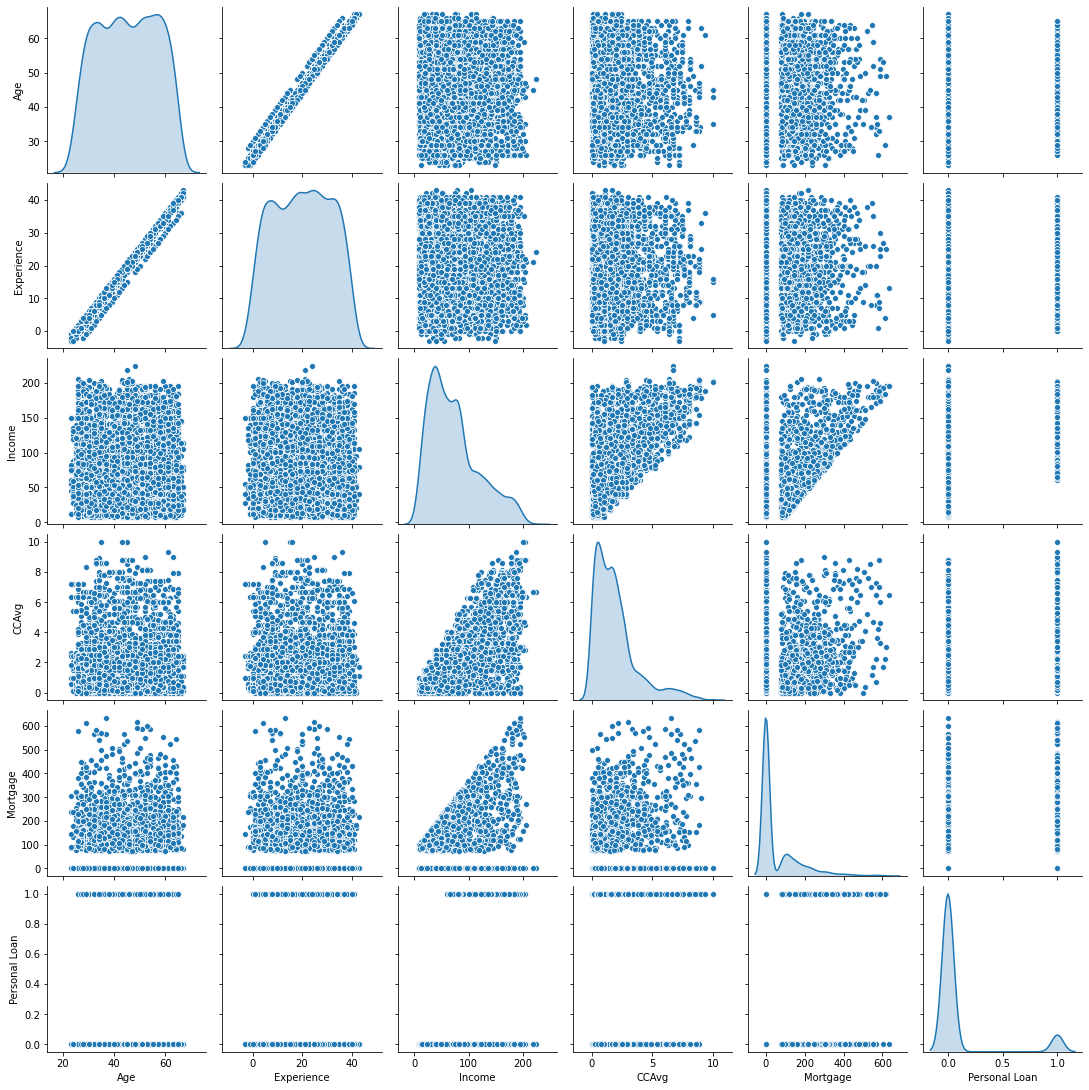

In [22]:
sns.pairplot(df_num,diag_kind='kde')

#### Insights:
1. There is absolutely no relationship between Income and Age  and Income vs Experience. Data is distributed fairly evenly
2. With incrase in income credit card spending and mortgage increases steadily


###  Correlation between numeric variables

In [23]:
df_num.corr()

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan
Age,1.000000,0.994215,-0.055269,-0.052012,-0.012539,-0.007726
Experience,0.994215,1.000000,-0.046574,-0.050077,-0.010582,-0.007413
Income,-0.055269,-0.046574,1.000000,0.645984,0.206806,0.502462
CCAvg,-0.052012,-0.050077,0.645984,1.000000,0.109905,0.366889
Mortgage,-0.012539,-0.010582,0.206806,0.109905,1.000000,0.142095
Personal Loan,-0.007726,-0.007413,0.502462,0.366889,0.142095,1.000000


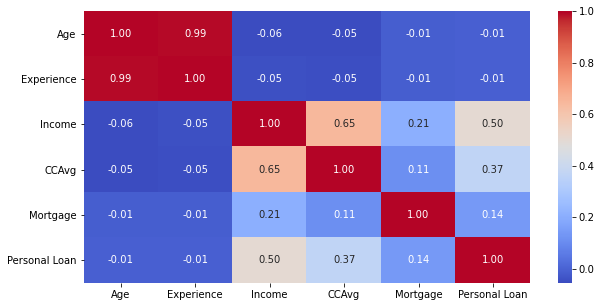

In [24]:
fig = plt.figure(1,(10,5))
sns.heatmap(df_num.corr(),annot=True,fmt='.2f',cmap='coolwarm')

####  Insights:
1. There is a very good positive correlation between Age and experience which is quite obvious
2. There is almost no correlation between Age, income, CCAvg, Mortgage and personal loan
3. The best positive correlation of personal loan is with Income followed by Credit card spending. i.e chances of a customer opting for a personal loan is higher for higher income groups and customers with higher credit card spendings. 
4. There is no correlation between personal loan and age and experience
5. There is a fair amount of positive correlation between credit card spending and Income


## Analysis of Numeric vs Categorical Variables

##### 1. Variation of Numeric variables with Education
In this section we will analyse how all numeric variables vary with Education 

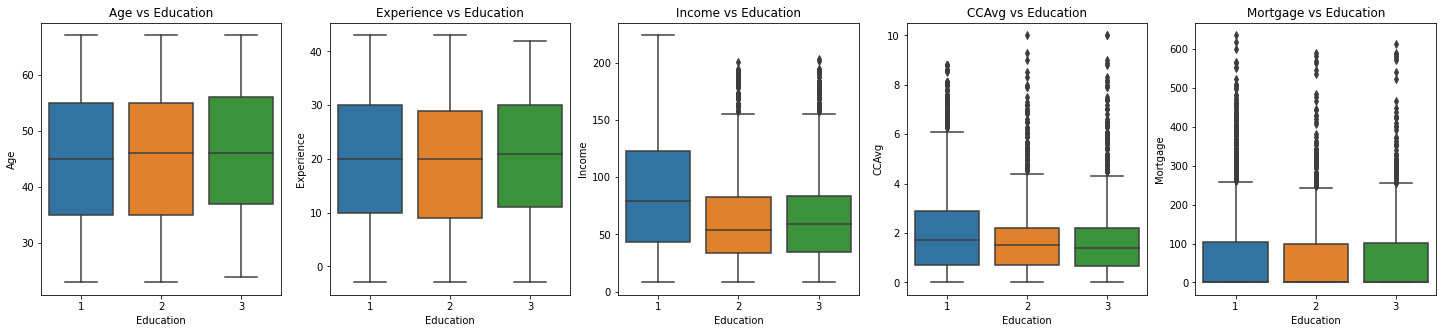

In [25]:
fig = plt.figure(1,(25,5))

for i, col in enumerate(col_numeric):
    ax=plt.subplot(1,5,i+1)
    sns.boxplot(x=df_cat['Education'],y=df_num[col])
    ax.set_title(col + ' vs Education' )

#### Insights
1. Surprisingly, in this dataset average income of undergraduates is higher than that of graduated or post graduates
2. With increase in level of education average credit card spending tend to decrease
3. Average age and experience are almost same across all education levels 

#### 2. Variation of Numeric variables with Family
In this section we will analyse how all numeric variables vary with number of members in the family

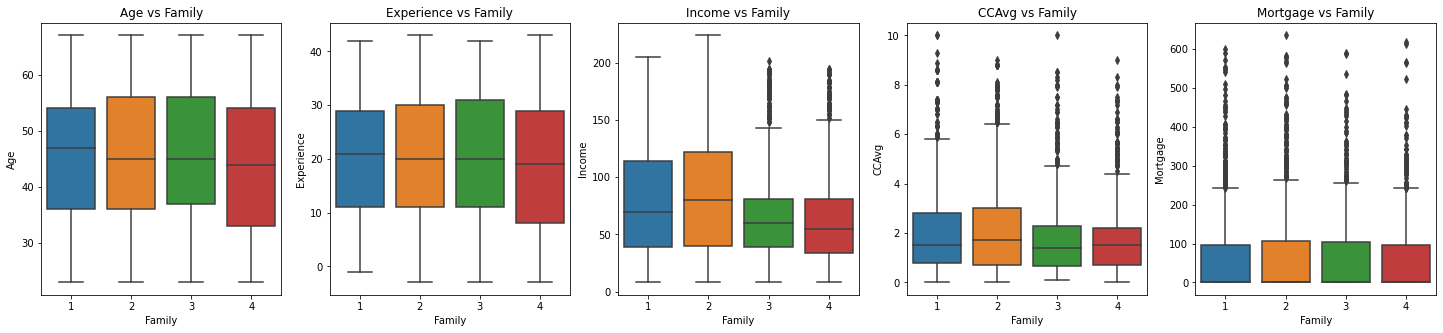

In [26]:
fig = plt.figure(1,(25,5))

for i, col in enumerate(col_numeric):
    ax=plt.subplot(1,5,i+1)
    sns.boxplot(x=df_cat['Family'],y=df_num[col])
    ax.set_title(col + ' vs Family' )

##### Insights
1. Average income and Credit card spending is maximum when there are 2 members in the family
2. As number of family members increases credit card spendings and average income decreases


### Numeric vs Target Variable

We will try to analyse relationship between numeric variables and target variable Persoanl Loan


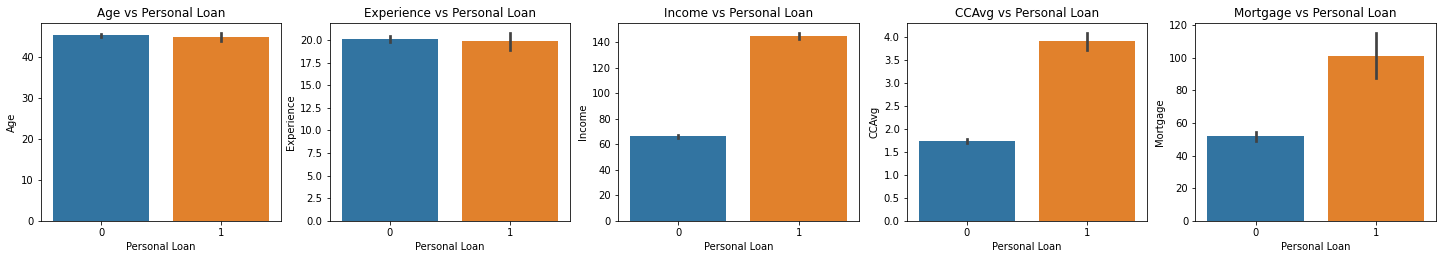

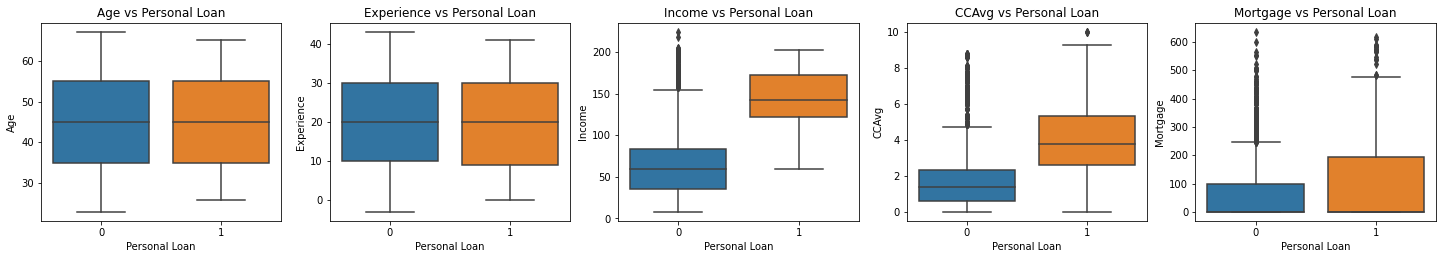

In [27]:
fig1 = plt.figure(1,(25,8))

for i,col in enumerate(col_numeric):
    ax = plt.subplot(2,5,i+1)
    sns.barplot(y=df_num[col],x=df_num['Personal Loan'])
    ax.set_title(col + ' vs Personal Loan')

    
fig2 = plt.figure(2,(25,8))

for i,col in enumerate(col_numeric):
    ax = plt.subplot(2,5,i+1)
    sns.boxplot(y=df_num[col],x=df_num['Personal Loan'])
    ax.set_title(col + ' vs Personal Loan')
    

    

#####  Insights:
Age Vs Personal Loan
1. (bar plot)dataset is balanced 
2. (Box Plot) Q1, Median and Q3 'Age' are same for customers who opted for Persoanl loans as well as who didnot opt
3. (Box Plot) Minimum age for customers buying a personal loan is slightly higher than the ones who didnot
4. (Box Plot) Maximum age for customers buying a personal loan is slightly lower than the ones who didnot

Experience vs Personal Loan
1. (bar PLot) dataset is balanced
2. (Box Plot) Q1, Median and Q3 of 'Experience' are same for customers who opted for Persoanl loans as well as who didnot opt
3. (Box Plot) Minimum Experience for customers buying a personal loan is slightly higher than the ones who didnot
4. (Box Plot) Maximum Experience for customers buying a personal loan is slightly lower than the ones who didnot 

Income vs Personal loan
1. Mean income of people who bought perosnal loans is quite high compared to people who didnot
2. People with higher income tend to opt MORe for perosnal loans. there are no outliers in data for customers who opted for personal loans
3. There are lot of Outliers in the data for people who didnot buy Personal loans i.e. there are many high income customers who didnot opt for personal loans
4. Minimum income of cusotmers who opted for personal loan is almost equal to mean value of income for people who didnot opt for personal loan

CCAvg vs Personal Loan
1. Mean credit card spending of customers who opted for personal loans is higher than the ones who didnot opt 
2. People with higher credit card spending tend to opt MORe for personal loan
3. There are lot of outliers in the data for customers not opting for personal loans i.e. there are many customers with higher credit card spending who didnot opt for personal loan.

Motgage vs Personal loan
1. Maximum value of mortgage is much higher for customers who opted for personal loan than the customers who didnot opt
2. minimum is zero for both the categories of the customers
3. There are lot of outliers in both the categories

## Data Preprocessing

#### 1. Handling zeros in Variable Mortgage
There are no null values in any of the columns, however there are lots of zeros in the column Mortgage.
we will handle these zeros

In [28]:
# What is the fraction of zeros in the variable 'Mortgage'
print("Fraction of zeros in column Motgage are : " + str((len(data[data['Mortgage'] == 0]))/len(data)*100)+ " %")

Fraction of zeros in column Motgage are : 69.24 %


Almost 70% values in this attribute are zeros

We also saw from EDA that this attribute doesnot contribute much to the classification of Personal loan (Taregt variable) i.e there is almost no correlation between MOrtgage and Personal loan

###### Conclusion: This column shall be dropped from the dataset as this contains 69.24% of zeros since this looks like a gap in dta collection.
###### Note : I tried building all the models without dropping column 'Mortgage' There is negligible impact on the model performances

In [29]:
# dropping the column 'Mortgage' and checking the head again of the data
data = data.drop(['Mortgage'],axis=1)
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


####  2. Encoding categorical columns
In this section we will encode all the categorical columns and create dummy variables for the same.

In [30]:
#which are the categorical columns
col_cat

['Family',
 'Education',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

In [31]:
df = pd.get_dummies(data,columns=col_cat)
df.head()

,Age,Experience,Income,CCAvg,Personal Loan,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3,Securities Account_0,Securities Account_1,CD Account_0,CD Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1
0,25,1,49,1.6,0,0,0,0,1,1,0,0,0,1,1,0,1,0,1,0
1,45,19,34,1.5,0,0,0,1,0,1,0,0,0,1,1,0,1,0,1,0
2,39,15,11,1.0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0
3,35,9,100,2.7,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0
4,35,8,45,1.0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1


In above section we have encoded the categorical columns. and created more number of columns

df becomes new dataset on which we will perform rest of the actions.

#### 3. Outliers in Numeric columns
In this section we will identify the outliers in all the numeric column.
We will check their counts and take a decision on how to handle them

In [32]:
def data_outliers(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    
    iqr = q3-q1
    
    min_range = q1 - iqr*1.5
    max_range = q3 + iqr*1.5
    
    outliers = x[(x<min_range) | (x>max_range)]
    return outliers

In [33]:
#since we have already dropped Mortgage columnsb
for col in col_numeric[0:-1]:
    outliers = data_outliers(df[col])
    print(col + " - " + str(len(outliers)/len(data)*100 ) + ' %')
    #if len(outliers):
     #   print(f"* {col} has these tukey outliers,\n{outliers}\n")
    #else:
     #   print(f"* {col} doesn't have any tukey outliers.\n")

Age - 0.0 %
Experience - 0.0 %
Income - 1.92 %
CCAvg - 6.4799999999999995 %


1. We can see that there are no outliers in the variables Age and Experience
2. There are 1.9% outliers in Income and 6.5% outliers in CCAvg variables. We can drop these rows as these are not significant.

##### 3.1 Dropping the outliers

In [34]:
for col in col_numeric[0:-1]:
    x = data_outliers(df[col])
    df = df.drop(np.array(x.index),axis=0)

In [35]:
#new shape of the dataframe after dropping theoutliers
df.shape

(4623, 20)

#### 4. Scaling the numerical attributes
1. We can see that Age and experience are just numbers mostly 2 digit
2. Income and CCAvg are columns which are in thousands but reprsented without 000 

Hence to bring all the columns in one scale we need to scale the variables
We will use StandardScaler class for this purpose


In [36]:
df.head()

,Age,Experience,Income,CCAvg,Personal Loan,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3,Securities Account_0,Securities Account_1,CD Account_0,CD Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1
0,25,1,49,1.6,0,0,0,0,1,1,0,0,0,1,1,0,1,0,1,0
1,45,19,34,1.5,0,0,0,1,0,1,0,0,0,1,1,0,1,0,1,0
2,39,15,11,1.0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0
3,35,9,100,2.7,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0
4,35,8,45,1.0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1


In [37]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()

#make a copy of the dataframe
df_scaled = df.copy()

#make a dataframe of only those columns to be scaled
col_to_scale = df_scaled[col_numeric[0:-1]]

#Scale only those column values
col_to_scale = stdScaler.fit_transform(col_to_scale.values)

#add the scaled values to the same dataset
df_scaled[col_numeric[0:-1]] = col_to_scale

df_scaled.head()



,Age,Experience,Income,CCAvg,Personal Loan,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3,Securities Account_0,Securities Account_1,CD Account_0,CD Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1
0,-1.784030,-1.673409,-0.447531,0.016035,0,0,0,0,1,1,0,0,0,1,1,0,1,0,1,0
1,-0.043596,-0.108632,-0.826508,-0.069064,0,0,0,1,0,1,0,0,0,1,1,0,1,0,1,0
2,-0.565726,-0.456360,-1.407607,-0.494559,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0
3,-0.913813,-0.977953,0.840991,0.952123,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0
4,-0.913813,-1.064885,-0.548592,-0.494559,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1


##### Conclusions:
With this our preprocessing is complete and we donot need to perform any other transformation 

df_scaled is final dataset for preprocessing

## Separating Target variable and independent variables

In [38]:
# X contains Independent variables
X = df_scaled.drop(['Personal Loan'],axis=1)

#y is the target Variable
y = df_scaled['Personal Loan']

##  Splitting the dataset in Train and Test

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=1, test_size=0.30)

In [40]:
# lets see the proportion of data in each set
print("Proportion of data in X_train : " + str(len(X_train)/len(X)*100) + " %")
print("Proportion of data in X_test : " + str(len(X_test)/len(X)*100) + " %")
print("Proportion of data in y_train : " + str(len(y_train)/len(y)*100) + " %")
print("Proportion of data in y_test : " + str(len(y_test)/len(y)*100) + " %")

Proportion of data in X_train : 69.9978369024443 %
Proportion of data in X_test : 30.0021630975557 %
Proportion of data in y_train : 69.9978369024443 %
Proportion of data in y_test : 30.0021630975557 %


## 1. Logistic Regression

#### 1.1 Base Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve

In [42]:
clf_base_logistic = LogisticRegression()
clf_base_logistic.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

###### 1.1.1 Accuracy score comparison for test and train data

In [43]:
print('Score on test set is {0:0.4f}'.format(clf_base_logistic.score(X_test,y_test)))
print('Score on train set is {0:0.4f}'.format(clf_base_logistic.score(X_train,y_train)))

Score on test set is 0.9719
Score on train set is 0.9703


Model Scores on train and test set is same and is quite high
This shows that this is not an overfir model and has a good performance

####  1.2 Plotting ROC curve, FPR and TPR 

In [44]:
prob = pd.DataFrame(clf_base_logistic.predict_proba(X_test))
y_prob = list(prob[1])
fpr, tpr, th = roc_curve(y_test,y_prob)

rates_log_df = pd.DataFrame(columns=['FPR','TPR','Threshold'])
rates_log_df['FPR'] = fpr.round(3)
rates_log_df['TPR'] = tpr.round(3)
rates_log_df['Threshold'] = th.round(3)
rates_log_df

,FPR,TPR,Threshold
0,0.000,0.000,2.000
1,0.000,0.011,1.000
2,0.000,0.556,0.795
3,0.001,0.556,0.758
4,0.001,0.611,0.695
...,...,...,...
65,0.623,0.989,0.001
66,0.625,0.989,0.001
67,0.720,0.989,0.000
68,0.720,1.000,0.000


Area under the curve AUC is 0.9641


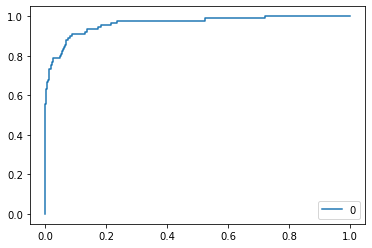

In [45]:
#RoC Curve
prob = pd.DataFrame(clf_base_logistic.predict_proba(X_test))
y_prob = list(prob[1])
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_prob)
auc = metrics.roc_auc_score(y_test,y_prob)
plt.plot(fpr,tpr)
plt.legend(str(auc),loc=4)
print("Area under the curve AUC is {0:0.4f}".format(auc))

##### 1. 3 Confusion Matrix for basic logistic regression classifier

In [46]:
cm_basic_log = confusion_matrix(y_test,clf_base_logistic.predict(X_test))
df_cm_basic_log = pd.DataFrame(cm_basic_log)
df_cm_basic_log

,0,1
0,1287,10
1,29,61


Text(0.5, 1.0, 'Confusion Matrix - Base Logistic Regression')

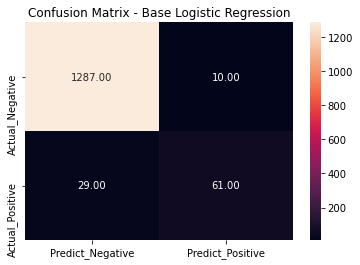

In [47]:
#plotting heatmap for basic logistic regressionclassigier confusio matrix
sns.heatmap(df_cm_basic_log,fmt='.2f',annot=True,xticklabels=['Predict_Negative','Predict_Positive'],yticklabels=['Actual_Negative','Actual_Positive'])
plt.title('Confusion Matrix - Base Logistic Regression')

In [48]:
basic_log_CR = classification_report(y_test,clf_base_logistic.predict(X_test))
print('Classification report for Basic logistic regression model')
print('-' * 60)
print(basic_log_CR)

Classification report for Basic logistic regression model
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1297
           1       0.86      0.68      0.76        90

    accuracy                           0.97      1387
   macro avg       0.92      0.84      0.87      1387
weighted avg       0.97      0.97      0.97      1387



#### Insights:
class = 0 means customers who didnot opt for personal loan
class = 1 means customers who opted for peersonal loan

1. only 39 points have been classified incorrectly by basic logistic classifier WITHOUT hyperparameter tuning
2. Percentage of positives is actually very low in the dataset. Most of them have ben predicted correctly
3. Data set is highly imbalanced which is also evident from values under support.
4. recall for class 1 is very low because the total number of observations for class 1 are very low in dataset, we have already witnessed the same in EDA
5. Since the dataset is highly imbalanced precision and recall scores of class 0 and 1 have some differences 0.98 vs 0.86. hence, this classifier seems to classify class 0 better than class 1

In below section we will try hyperparameter tuning for Logistic regression and try to find best model. The accuracy of 97% is already very good for basic logistic regression but since the dataset is highly imbalanced accuraccy of 97% is not very meaningful (precision and recall scores are high which is good), lets check how much improvement we can bring using hyperparameter tuning

###  1.4 Logistic Regression with hyperparameter tuning

In [49]:
#we will create a new logistic regression object for gridsearch cv
logistic_cv = LogisticRegression()

######  1.5 Lets create a hyperparameter space for use in gridsearch cv

In [50]:
#we will create a dictionary for hyperparameter.
# This dict will have key like penalty: which regulariser to be user l1 or l2 AND a space for hyperparameter C

penalty = ['l1','l2']
C = np.logspace(0,4,10)

hyperparameter = dict(C=C, penalty=penalty)


In [51]:
# Now we will build a logistic classifier based on GridSearchCV
clf_best_logistic = GridSearchCV(logistic_cv, hyperparameter, cv=10)
clf_best_logistic.fit(X_test,y_test)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
           

######  1.6 Accuracy scores for logistic regression with hyperparameter tuning

In [52]:
print('Score on test set is {0:0.4f}'.format(clf_best_logistic.score(X_test,y_test)))
print('Score on train set is {0:0.4f}'.format(clf_best_logistic.score(X_train,y_train)))

Score on test set is 0.9748
Score on train set is 0.9666


Note: There is not much difference in train and test accuracy score for logistic regression with and without hyperparamter tuning

###### 1.7 Printing the best paramters for this model

In [53]:

print("Best Penalty : {}".format(clf_best_logistic.best_params_['penalty']))
print("Best Hyperparmeter C : {0:.2f}".format(clf_best_logistic.best_params_['C']))


#clf_log_cv.best_params_

Best Penalty : l2
Best Hyperparmeter C : 166.81


###### 1.8 Confusion Matrix for best model

In [54]:
df_cm_clf_log_cv = pd.DataFrame(confusion_matrix(y_test,clf_best_logistic.predict(X_test)))
df_cm_clf_log_cv

,0,1
0,1289,8
1,27,63


Text(0.5, 1.0, 'Confusion Matrix - Best Logistic regression model')

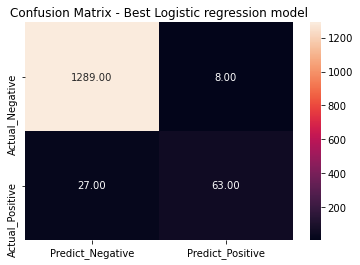

In [55]:
#Heatmap of confusion matrix of best model
sns.heatmap(df_cm_clf_log_cv,annot=True,fmt='0.2f',xticklabels=['Predict_Negative','Predict_Positive'],yticklabels=['Actual_Negative','Actual_Positive'])
plt.title('Confusion Matrix - Best Logistic regression model')

###### 1.9 Classification report for best logistic regression model

In [56]:
print('Classification report for best logistic regression model')
print('-' * 60)
print(classification_report(y_test,clf_best_logistic.predict(X_test)))

Classification report for best logistic regression model
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1297
           1       0.89      0.70      0.78        90

    accuracy                           0.97      1387
   macro avg       0.93      0.85      0.88      1387
weighted avg       0.97      0.97      0.97      1387



####  Insights
1. Only 36 incorrectly classified points
2. There is a slight improvement in precision score for class 1
3. There is no improvement in precision, recall and f1 score for class 0 which is already quite high

###### Conclusion:
Overall there is a slight improvement in prediction accuracy, precision, recall and f1 score when hyperparameters are tuned using GridSearchCV with 10 fold cross validations

##  2. k Nearest Neighbours

######  2.1 Building basic KNN classifier

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
clf_base_knn = KNeighborsClassifier()
clf_base_knn.fit(X_test,y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Observations:
1. This is a basic knn classifier with default parameters
2. Default n_neighbors = 5  ==> 5 nearest neighbours are used for computation
3. p=2 ==> This is distance measure for minkowski metric. P=1 means manhattan distance, P=2 - Eucledian distance, will be used for computation
4. weights option can have 'uniform' or 'distance' as option for computation

###### 2.1.1 Accuracy score for test and train data

In [59]:
print('KNN Accuracy Score on test set is {0:0.4f}'.format(clf_base_knn.score(X_test,y_test)))
print('KNN Accuracy Score on train set is {0:0.4f}'.format(clf_base_knn.score(X_train,y_train)))

KNN Accuracy Score on test set is 0.9719
KNN Accuracy Score on train set is 0.9506


The accuracy scores for test is vbery high 97 % and almost same as train data, hence there doesot seem to be any overfitting

######  2.2 Confusion Matrix and Classification report for basic knn

In [60]:
# confusion matrix for basic KNN
df_clf_base_knn = pd.DataFrame(confusion_matrix(y_test,clf_base_knn.predict(X_test)))
df_clf_base_knn

,0,1
0,1296,1
1,38,52


Text(0.5, 1.0, 'Confusion Matrix - Base KNN Model')

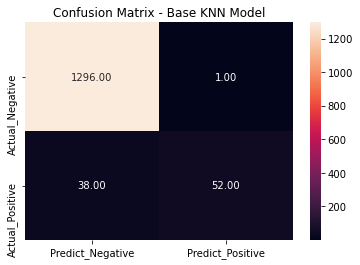

In [61]:
# heatmap for basic knn model
sns.heatmap(df_clf_base_knn,annot=True,fmt='.2f',xticklabels=['Predict_Negative','Predict_Positive'],yticklabels=['Actual_Negative','Actual_Positive'])
plt.title('Confusion Matrix - Base KNN Model')

At this point 
1. This model doesnot seem to work very well for positive points as False positive Rate = 38 i shigh and True Positive Rate = 52 is quite low compared to Logistic regression model
2. Total number of misclassified points are also high 39 same as Logistic regression model

In [62]:
#Classificaiton report
print(classification_report(y_test,clf_base_knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1297
           1       0.98      0.58      0.73        90

    accuracy                           0.97      1387
   macro avg       0.98      0.79      0.86      1387
weighted avg       0.97      0.97      0.97      1387



#### Insights:
class = 0 means customers who didnot opt for personal loan
class = 1 means customers who opted for peersonal loan

1. only 39 points have been classified incorrectly by basic logistic classifier WITHOUT hyperparameter tuning
2. Percentage of positives is actually very low in the dataset. Most of them have ben predicted correctly
3. Data set is highly imbalanced which is also evident from values under support.
4. recall for class 1 is very low because the total number of observations for class 1 are very low in dataset, we have already witnessed the same in EDA
5. Since the dataset is highly imbalanced precision and recall scores of class 0 and 1 have some differences, hence, this classifier seems to classify class 0 better than class 1

#### 2.4 KNN with hyperparameter tuning
We will use following paramters for tuning the knn model
1. n_neighbors=range from 1 to 30
2. p=1,2


In [63]:
# building a hyperparamter space
#leaf_size = list(range(1,51))
#pWeights = ['uniform','distance']

nbrs = list(range(1,50))
p =[1,2]


#hyperparameters = dict(leaf_size=leaf_size,n_neighbors=nbrs,p=p,weights=pWeights)
hyperparameters = dict(n_neighbors=nbrs,p=p)

In [64]:
import time
start_time = time.time()

knn_cv = KNeighborsClassifier()
clf_best_knn = GridSearchCV(knn_cv,hyperparameters,cv=10,n_jobs=-1)
clf_best_knn.fit(X_train,y_train)

print("--- %s Time taken for processing ---{} minutes".format((time.time() - start_time)/60) )

--- %s Time taken for processing ---0.18750855127970378 minutes


###### 2.4.1Accuracy scores for KNN after hypertuning the parameter

In [65]:
print('KNN Accuracy Score(best model) on test set is {0:0.4f}'.format(clf_best_knn.score(X_test,y_test)))
print('KNN Accuracy Score(best Model) on train set is {0:0.4f}'.format(clf_best_knn.score(X_train,y_train)))


KNN Accuracy Score(best model) on test set is 0.9697
KNN Accuracy Score(best Model) on train set is 0.9811


###### 2.4.2 Best parameters

In [66]:
print(clf_best_knn.best_params_)
print('Best n neighbrs : {}'.format(clf_best_knn.best_params_['n_neighbors']))

{'n_neighbors': 3, 'p': 2}
Best n neighbrs : 3


###### 2.4.3 Rebuilding the knn with best parameters

In [67]:
clf_final_knn = KNeighborsClassifier(n_neighbors=3,p=2)
clf_final_knn.fit(X_test,y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

######  2.4.4 Accuracy score, Confusion Matrix and Classification report

In [68]:
# Accuracy score on new model
print('KNN Accuracy Score(best model) on test set is {0:0.4f}'.format(clf_final_knn.score(X_test,y_test)))
print('KNN Accuracy Score(best Model) on train set is {0:0.4f}'.format(clf_final_knn.score(X_train,y_train)))

KNN Accuracy Score(best model) on test set is 0.9791
KNN Accuracy Score(best Model) on train set is 0.9527


Notes:
1. Well, This model seems to work better on the test dataset. Out of sample accuracy score is 97%
2. In sample score is 95.2%
This seems to be acceptable


In [69]:
df_cm_clf_final_knn = pd.DataFrame(confusion_matrix(y_test,clf_final_knn.predict(X_test)))
df_cm_clf_final_knn

,0,1
0,1296,1
1,28,62


Text(0.5, 1.0, 'Confusion Matrix - Best KNN Model')

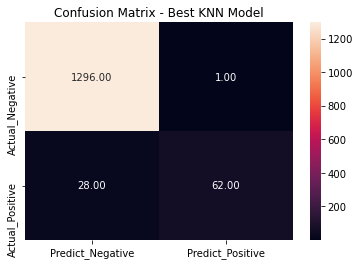

In [70]:
# Heatmap for confusion matrix
sns.heatmap(df_cm_clf_final_knn,annot=True,fmt='0.2f',xticklabels=['Predict_Negative','Predict_Positive'],yticklabels=['Actual_Negative','Actual_Positive'])
plt.title('Confusion Matrix - Best KNN Model')

We can clearly see that most of the data points are classified correctly
29 points are not classified correctly

In [71]:
# Classification report
print(classification_report(y_test,clf_final_knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1297
           1       0.98      0.69      0.81        90

    accuracy                           0.98      1387
   macro avg       0.98      0.84      0.90      1387
weighted avg       0.98      0.98      0.98      1387



#### Insights
1. This model has high precision, recall and f1 score. Accuracy of this model is also 97% on unseen data i.e Test dataset
2. After hyperparameter tuning FP and FN have dropped compared to KNN model before hyperparameter tuning
3. For this model number of neighbors is also very low  = 3 hence model tends to have acceptable time complexity




###### 2.4.6 FPR, TPR and ROC curve for best KNN model

In [72]:
#first calculate the probabilities of the prediction
prob = pd.DataFrame(clf_final_knn.predict_proba(X_test))
y_prob  = list(prob[1])

#unpacking the tuple created by fpr,
fpr,tpr,th = roc_curve(y_test,y_prob)

In [73]:
rates_knn_df = pd.DataFrame(columns=['FPR','TPR','Threshold'])
rates_knn_df['FPR'] = fpr.round(3)
rates_knn_df['TPR'] = tpr.round(3)
rates_knn_df['Threshold'] = th.round(3)
rates_knn_df

,FPR,TPR,Threshold
0,0.000,0.000,2.000
1,0.000,0.356,1.000
2,0.001,0.689,0.667
3,0.019,1.000,0.333
4,1.000,1.000,0.000


Area under the curve AUC for Naive Bayes classifier is 0.9968


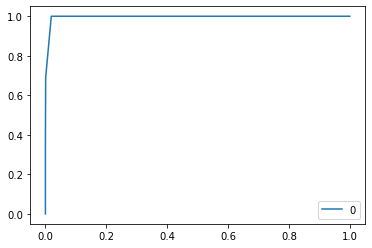

In [74]:
#RoC Curve
prob = pd.DataFrame(clf_final_knn.predict_proba(X_test))
y_prob = list(prob[1])
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_prob)
auc = metrics.roc_auc_score(y_test,y_prob)
plt.plot(fpr,tpr)
plt.legend(str(auc),loc=4)
print("Area under the curve AUC for Naive Bayes classifier is {0:0.4f}".format(auc))

##### Insights
1. Area under the curve is very high 0.996 ~ 1
2. This shows high perfomrance of the model on unseen data

## 3 Naive Bayes

We donot require hyperparameter tuning for this as this is a probabilistic method

###### 3.1 Building the naive bayes model

In [75]:
from sklearn.naive_bayes import GaussianNB

In [76]:
clf_nb = GaussianNB()
clf_nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

###### 3.2 Accuracy and confusion matrix

In [77]:
# Accuracy score on naive bayesmodel
print('Naive Bayes model accuracy on test set is {0:0.4f}'.format(clf_nb.score(X_test,y_test)))
print('Naive Bayes model accuracy on train set is {0:0.4f}'.format(clf_nb.score(X_train,y_train)))


Naive Bayes model accuracy on test set is 0.9301
Naive Bayes model accuracy on train set is 0.9227


1. The accuracy score on test set unseen data is slightly higher than the train set
2. Since accuracy score is almost same in train as test set there is no chance of overfitting
3. Score of 93% on unseen data is pretty good

In [78]:
# confusion matrix
df_cm_clf_nb = pd.DataFrame(confusion_matrix(y_test,clf_nb.predict(X_test)))
df_cm_clf_nb

,0,1
0,1249,48
1,49,41


Text(0.5, 1.0, 'Confusion Matrix - Naive Bayes Model')

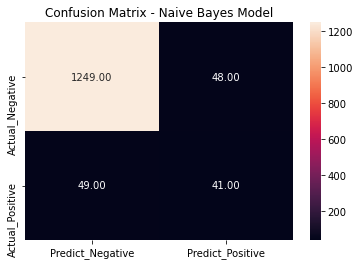

In [79]:
# Heatmap for analysing the confusion matrix
sns.heatmap(df_cm_clf_nb,annot=True,fmt='0.2f',xticklabels=['Predict_Negative','Predict_Positive'],yticklabels=['Actual_Negative','Actual_Positive'])
plt.title("Confusion Matrix - Naive Bayes Model")

##### Insights
1. Number of misclassified points are quite high in this model = 97. This is highest among all the 3 models so far
2. FPR = 49 is higher than TPR = 41


######  3.3 Classification Report

In [80]:
# prepare the classification report for this model
print(classification_report(y_test,clf_nb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1297
           1       0.46      0.46      0.46        90

    accuracy                           0.93      1387
   macro avg       0.71      0.71      0.71      1387
weighted avg       0.93      0.93      0.93      1387



1. Precesion recall and f1 score are very low for class = 1. This has happend because model is unable to predict Positive values correctly
2. Model is able to predict class=0 values with high accuracy, however since this problem demands a very high value of TPR and low value of FPR, precision and recall for classification of class 1 should be high
Overall f1 score should be high for class = 1

###### 3.4 FPR , TPR and Thresholds for this model

In [81]:
#first calculate the probabilities of the prediction
prob = pd.DataFrame(clf_nb.predict_proba(X_test))
y_prob  = list(prob[1])

#unpacking the tuple created by fpr,
fpr,tpr,th = roc_curve(y_test,y_prob)

In [82]:
rates_df = pd.DataFrame(columns=['FPR','TPR','Threshold'])
rates_df['FPR'] = fpr.round(3)
rates_df['TPR'] = tpr.round(3)
rates_df['Threshold'] = th.round(3)
rates_df

,FPR,TPR,Threshold
0,0.000,0.000,2.0
1,0.000,0.011,1.0
2,0.000,0.078,1.0
3,0.001,0.078,1.0
4,0.001,0.133,1.0
...,...,...,...
97,0.595,1.000,0.0
98,0.597,1.000,0.0
99,0.648,1.000,0.0
100,0.650,1.000,0.0


###### 3.5 ROC Curve and Area under curve

Area under the curve AUC for Naive Bayes classifier is 0.9420


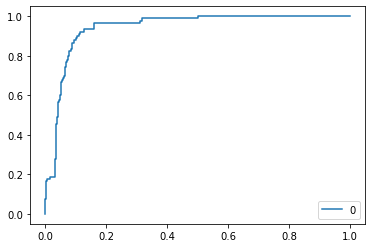

In [83]:
#RoC Curve
prob = pd.DataFrame(clf_nb.predict_proba(X_test))
y_prob = list(prob[1])
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_prob)
auc = metrics.roc_auc_score(y_test,y_prob)
plt.plot(fpr,tpr)
plt.legend(str(auc),loc=4)
print("Area under the curve AUC for Naive Bayes classifier is {0:0.4f}".format(auc))

##### Insights:
class = 0 means customers who didnot opt for personal loan class = 1 means customers who opted for peersonal loan

1. Accuracy of model on test data is around 93%
2. precesion, recall and f1 score for classification of class = 0 are high. This is because dataset is imbalanced and number of observations for class = 0 are high
3. precision, recall and f1 score for classification of class = 1 are low. 
4. Hence this model is not efficient enough to classify class = 1.

## 4 Model comparison and evaluation
In this section we will compare and evaluate Logistic regression, KNN and Naive Bayes models constructed in above sections on various parameters

#### 4.1 Model Accuracy

In [84]:
print('Logistic regression Score(Best Model) on test dataset is {0:0.4f}'.format(clf_best_logistic.score(X_test,y_test)))
print('Logistic regression Score(Best Model) on train dataset is {0:0.4f}'.format(clf_best_logistic.score(X_train,y_train)))
print('-' * 80)
print('KNN Accuracy Score(best model) on test dataset is {0:0.4f}'.format(clf_final_knn.score(X_test,y_test)))
print('KNN Accuracy Score(best Model) on train dataset is {0:0.4f}'.format(clf_final_knn.score(X_train,y_train)))
print('-' * 80)
print('Naive Bayes model accuracy on test dataset is {0:0.4f}'.format(clf_nb.score(X_test,y_test)))
print('Naive Bayes model accuracy on train dataset is {0:0.4f}'.format(clf_nb.score(X_train,y_train)))

Logistic regression Score(Best Model) on test dataset is 0.9748
Logistic regression Score(Best Model) on train dataset is 0.9666
--------------------------------------------------------------------------------
KNN Accuracy Score(best model) on test dataset is 0.9791
KNN Accuracy Score(best Model) on train dataset is 0.9527
--------------------------------------------------------------------------------
Naive Bayes model accuracy on test dataset is 0.9301
Naive Bayes model accuracy on train dataset is 0.9227


##### Insights:
1. The accuracy score on unseen data is best for KNN model(=97.91%) while using 3 nearest neighbours as parameter
2. Second best accuracy score on unseen data is for Logistic regression classifier(=97.2%) which is coparable with KNN
3. There doesnot seem to be any overfitting or undefitting in any of the 3 models as accuracy scores on train and test dataset are almost the same or better in test dataset

#### 4.2 Precision, recall and f1 scores using classification report

In [85]:
print('Classification report for best logistic regression model')
print('-' * 80)
print(classification_report(y_test,clf_best_logistic.predict(X_test)))
print('-' * 80)
print('Classification report for best KNN model')
print('-' * 80)
print(classification_report(y_test,clf_final_knn.predict(X_test)))
print('-' * 80)
print('Classification report for best Naive Bayes model')
print('-' * 80)
print(classification_report(y_test,clf_nb.predict(X_test)))

Classification report for best logistic regression model
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1297
           1       0.89      0.70      0.78        90

    accuracy                           0.97      1387
   macro avg       0.93      0.85      0.88      1387
weighted avg       0.97      0.97      0.97      1387

--------------------------------------------------------------------------------
Classification report for best KNN model
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1297
           1       0.98      0.69      0.81        90

    accuracy                           0.98      1387
   macro avg       0.98      0.84      0.90      1387
weighted avg       0.98      0.98      0.98      1387

-----

##### Insights

Since in this problem dataset is imbalanced and number of points are very less for class=1 (customers opting for personal loan).
Also looking at the nature of the problem accuracy might not be the only best measure to judge the algorithm performance
We should also look at precision and recall scores.
1. Precision: TP/(FP+TP) ==> Off all the predicted positives by model how many are actually positive
2. Recall: TP/(TP+FN) ==> Off all the class=1 (positive) points what proportion our model is able to classify correctly

1. KNN performs best in terms of precision and recall i.e KNN tends to classify positive points correctly than other models
2. precision and recall scores are second best for logistic regression classifier for class=1
3. Precision and recall score are not very different for KNN and Logistic regression classifier
3. Naive bayes has fairly low precision and recall for class=1 which means this model cannot correctly predict which customers will buy personal loan on unseen data


#### 4.2 Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix - Best Naive Bayes classifier')

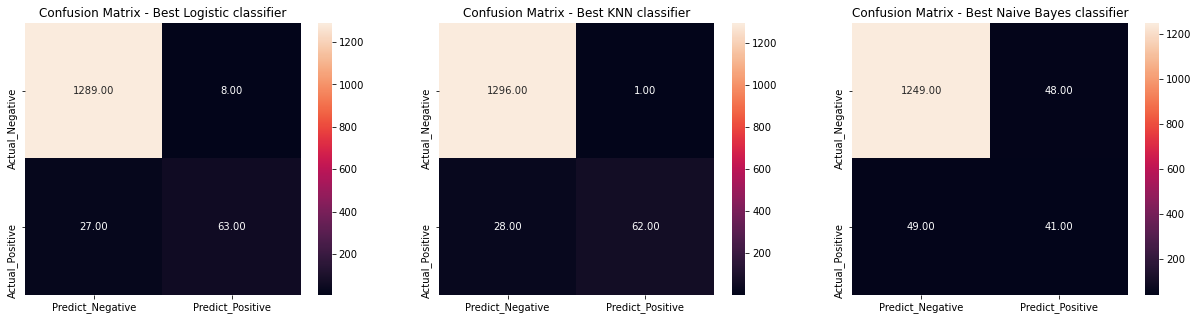

In [86]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(21,5))
sns.heatmap(df_cm_clf_log_cv,ax=ax1,annot=True,fmt='0.2f',xticklabels=['Predict_Negative','Predict_Positive'],yticklabels=['Actual_Negative','Actual_Positive'])
sns.heatmap(df_cm_clf_final_knn,ax=ax2,annot=True,fmt='0.2f',xticklabels=['Predict_Negative','Predict_Positive'],yticklabels=['Actual_Negative','Actual_Positive'])
sns.heatmap(df_cm_clf_nb,annot=True,ax=ax3,fmt='0.2f',xticklabels=['Predict_Negative','Predict_Positive'],yticklabels=['Actual_Negative','Actual_Positive'])

ax1.set_title('Confusion Matrix - Best Logistic classifier')
ax2.set_title('Confusion Matrix - Best KNN classifier')
ax3.set_title('Confusion Matrix - Best Naive Bayes classifier')

##### Insights
1. Number of incorrectly classfied points on unseen data is min(=29) for KNN and maximum(=97) for Naive Bayes
2. Logistic regression has 35 misclassified points
3. KNN has the best prediction for positive points onunseen data

#### 4.4 ROC Curve

Text(0.5, 1.0, 'ROC-Naive Bayes classifier (AUC=0.9420)')

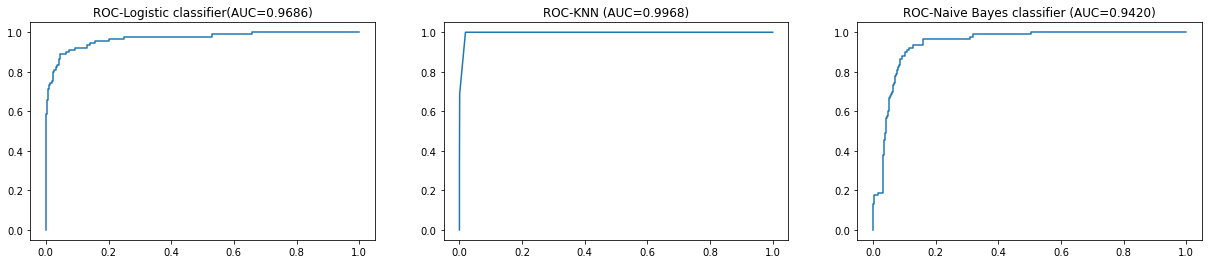

In [87]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(21,4))

prob = pd.DataFrame(clf_best_logistic.predict_proba(X_test))
y_prob = list(prob[1])
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_prob)
auc = metrics.roc_auc_score(y_test,y_prob)
ax1.plot(fpr,tpr)
ax1.set_title('ROC-Logistic classifier(AUC={0:0.4f})'.format(auc))


prob = pd.DataFrame(clf_final_knn.predict_proba(X_test))
y_prob = list(prob[1])
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_prob)
auc = metrics.roc_auc_score(y_test,y_prob)
ax2.plot(fpr,tpr)
ax2.set_title('ROC-KNN (AUC={0:0.4f})'.format(auc))


prob = pd.DataFrame(clf_nb.predict_proba(X_test))
y_prob = list(prob[1])
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_prob)
auc = metrics.roc_auc_score(y_test,y_prob)
ax3.plot(fpr,tpr,)
ax3.set_title('ROC-Naive Bayes classifier (AUC={0:0.4f})'.format(auc))




##### Insights

1. Area under the curve
AUC = Area Under the ROC curve.
Higher the AUC better the model is in correctly predicting classes i.e 0's as 0's and 1's as 1's

2. KNN has the best AUC = 0.996. Which means KNN can classify all the points correctly on unseen data
3. Logistic regression classifier also has a higher ROC ~ 0.97 which is second best. This is also evident from Confusion Matrix
4. Naive Bayes has the least AUC ~ 0.94.


In [88]:
#Comparison table here - use dataframe
from sklearn.metrics import precision_recall_fscore_support as score

df_knn = pd.DataFrame()
df_nb = pd.DataFrame()

# parameters for best logistic regression
precision,recall,fscore,support=score(y_test,clf_best_logistic.predict(X_test),average='macro')
paramC = clf_best_logistic.best_params_['C'].round(3)
auc = metrics.roc_auc_score(y_test,list(pd.DataFrame(clf_best_logistic.predict_proba(X_test))[1])).round(3)
dict_logistic = {'Algorithm':'Logistic',
                 'Accuracy':clf_best_logistic.score(X_test,y_test),
                'Precision':precision,
                'Recall':recall,
                'f1 Score':fscore,
                'AUC': auc,
                'Regularization param C':paramC}
df_logistic = pd.DataFrame(dict_logistic,index=[0])

# parameters for best logistic regression
precision,recall,fscore,support=score(y_test,clf_final_knn.predict(X_test),average='macro')
paramK = clf_best_knn.best_params_['n_neighbors']
auc = metrics.roc_auc_score(y_test,list(pd.DataFrame(clf_final_knn.predict_proba(X_test))[1])).round(3)
dict_knn = {'Algorithm':'KNN',
                 'Accuracy':clf_final_knn.score(X_test,y_test),
                'Precision':precision,
                'Recall':recall,
                'f1 Score':fscore,
                'AUC': auc,
                'Regularization param K':paramK}
df_knn = pd.DataFrame(dict_knn,index=[0])

# parameters for best logistic regression
precision,recall,fscore,support=score(y_test,clf_nb.predict(X_test),average='macro')
auc = metrics.roc_auc_score(y_test,list(pd.DataFrame(clf_nb.predict_proba(X_test))[1])).round(3)
dict_nb = {'Algorithm':'Naive Bayes',
                 'Accuracy':clf_nb.score(X_test,y_test),
                'Precision':precision,
                'Recall':recall,
                'f1 Score':fscore,
                'AUC': auc
          }
df_nb = pd.DataFrame(dict_nb,index=[0])

df_models = pd.concat([df_logistic,df_knn,df_nb],ignore_index=True)

print('Comparison of best models Logistic vs KNN vs Naive Bayes')
df_models

Comparison of best models Logistic vs KNN vs Naive Bayes


,Algorithm,Accuracy,Precision,Recall,f1 Score,AUC,Regularization param C,Regularization param K
0,Logistic,0.974766,0.933404,0.846916,0.884607,0.969,166.81,NaN
1,KNN,0.979092,0.981489,0.844059,0.899697,0.997,NaN,3.0
2,Naive Bayes,0.930065,0.711462,0.709274,0.710360,0.942,NaN,NaN


# 5. Conclusions

1. All the model evaluation parameters viz Accuracy, Precision, Recall and AUC are higher for KNN model but only by a slight margin
2. For KNN model use number of neighbors as 3 for optimised results on unseen data
3. Naive bayes doesnot perform well in classifying positive points(clas=1)(customers opting for Personal loan)
4. Second best choice can be Logistic regression. But this is not very different from KNN
5. Since the precision recall and f1 score is higher for KNN model. We should prefer KNN over Logistic regression classifier
5. Since for this dataset processing time for computation doesnot matter much KNN comes up as the best model

## I recommend KNN with K=3 as the best model for classification on this dataset
Other best parameters are recommended as below

## 6. Regularisation used in building BEST KNN

In this section we will discuss regularisation technique used in building best KNN model along with the value of all regularisation parameters

In [89]:
print('Best regularisation parameteres used to build best KNN model')
print('*'*60)
df_best = pd.DataFrame({'Type':'Best Values',
           'p': clf_best_knn.best_params_['p'],
           'Neighbours': clf_best_knn.best_params_['n_neighbors']},index=[0]
          )
df_initial = pd.DataFrame({'Type':'Initial Values','Neighbours':5,'p':2},index=[0])

df_comparison = pd.concat([df_best,df_initial],ignore_index=True)

df_comparison

Best regularisation parameteres used to build best KNN model
************************************************************


,Type,p,Neighbours
0,Best Values,2,3
1,Initial Values,2,5


##### Insights:
1. Method: GridSearchCV method was used to find the optimal value of KNN regularisation paramters
2. Regularisation paramters useed were n_neighbours and p

3. p: is the distanmce measure. p=1 corresponds to l1 regulariser using mnahattan distance to compute the nearest neighbours. p=2 corresponds to l2 regulariser using Eucledian distance  for the same purpose

4. n_neighbours: Number of neighbours that model should look for for each point to classify a point

**************************************************************************************************************
###### How regularisation was build using GridSearchCV

1. p : l2 regulariser was preffered choice of regulariser for computation of best knn model
2. n_neighbours: Number of neighbours were tested between 1 to 50 and best value cam eout to be 4 instead of initially initialised value of 5
3. njobs = -1 was used in GridsearchCV to use complete CPU and all cores of the machine to speed up the process. Before using n_jobs = -1 GridsearchCv took a hughe amoubnt of time for processing. After using this parameter 17 minutes were used to build the best model




## 7. Range estimate at 95% confidence for the model performance in production

Range estimate allows to predict a range of classification error with 95% liklihood on unseen data

For this purpose we will separate randomly a validation dataset from original dataset preapred after pre processing.

Our original dataaset used for splitting into test and train was df_scaled. We will use this dataframe to separate a sample 100 observations randomly

###### PS: I have used reference from following URL for the purpose of understanding and calculating Range estimate
https://machinelearningmastery.com/report-classifier-performance-confidence-intervals/


##### 7.1 Preparing validation dataset

we will use train test split to create a validation set.
We will not use X_train and y_train

In [90]:
X_train,X_val,y_train,y_val = train_test_split(X, y, test_size=0.25)

##### 7.2 Confusion Matrix

Text(0.5, 1.0, 'Conusion Matrix - Validation dataset')

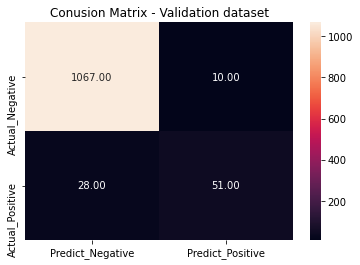

In [91]:
df_cm_val = pd.DataFrame(confusion_matrix(y_val,clf_best_logistic.predict(X_val)))
sns.heatmap(df_cm_val,annot=True,fmt='0.2f',xticklabels=['Predict_Negative','Predict_Positive'],yticklabels=['Actual_Negative','Actual_Positive'])
plt.title('Conusion Matrix - Validation dataset')

##### 7.3 Calculating error range for 95% confidence interval

Assumption:
The values for const are provided from statistics, and common values used are:

1.64 (90%)
1.96 (95%)
2.33 (98%)
2.58 (99%)

In [97]:
#classification error = incorrect predictions / total predictions

e = 38/(len(X_val))
print('Total error is {0:0.4f} and Error percentage is {1:0.4f} %'.format(e,e*100))


Total error is 0.0329 and Error percentage is 3.2872 %


In [98]:
# Range  calculation for 95% confidence interval
# we will use formula Rangfe = error +/- const * sqrt( (error * (1 - error)) / n)
# const = 1.96 for 95% C.I

const = 1.96
n  = len(X_val)

lower = e - const * np.sqrt( (e*(1-e))/ n)
higher = e + const * np.sqrt( (e*(1-e))/ n)

print('There is a 95% likelihood that the confidence interval [{0:0.4f}, {1:0.4f}] covers the true classification error of the model on unseen data'.format(lower,higher))

There is a 95% likelihood that the confidence interval [0.0226, 0.0432] covers the true classification error of the model on unseen data


##### Insights
###### There is a 95% liklihood that on an unseen data best KNN classifier will encounter error in the range of 2.26% to 4.32%